#### Imports

In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2025-06-03 18:55:17.511382: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 18:55:17.520926: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 18:55:17.541487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748987717.573363    7580 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748987717.584009    7580 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748987717.609212    7580 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

#### Pré-processamento
No meu dataset (Spruce.csv) a única variável que irá necessitar de um pré-processamento é a "Tree_Type":

"Other" -> 0;
"Spruce" -> 1

In [2]:
df = pl.read_csv("Spruce.csv", separator=",")

df = df.with_columns(
    pl.when(pl.col("Tree_Type") == "Other").then(0).otherwise(1).alias("Tree_Type")
)

#### Separação de dados

In [3]:
df = df.sample(shuffle=True, fraction=1, seed=321)

spruce_label = df["Tree_Type"].to_numpy()
spruce_values = df.drop(["Tree_Type"]).to_numpy()

spruce_values_train, spruce_values_test, spruce_label_train, spruce_label_test = train_test_split(spruce_values, spruce_label, test_size=0.2, random_state=321)

#### Naive Bayes

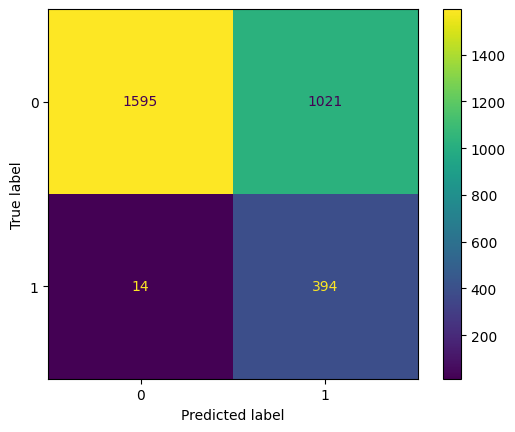

0.4322545255074054


In [4]:
#Naive Bayes gaussiano
nb = GaussianNB()
nb.fit(spruce_values_train, spruce_label_train)
nb.score(spruce_values_test, spruce_label_test) # 0.6623677248677249 ~= 66.2%

#Matriz de confusão
predictions = nb.predict(spruce_values_test)
c_matrix = confusion_matrix(spruce_label_test, predictions, labels=nb.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=nb.classes_)
display.plot()
plt.show()

f1_scoreGNB = f1_score(spruce_label_test, predictions, labels=nb.classes_)
print(f1_scoreGNB)

Matrix de confusão sobre set de teste:

![image.png](./images/ConfusionMatrixGNB.png)

Verdadeiro positivo: 394\
Verdadeiro negativo: 1595\
Falso negativo: 1021\
Falso positivo: 14\
F1 Score: 0.4322

#### Multilayer Perceptron (MLP)

In [ ]:
# Foi utilizado a biblioteca tensorflow+keras para a criação do modelo por familiaridade

# Foi utilizado duas camadas ocultas, com 16 neurônios e com função de ativação RELU
# Pois foi pensado como uma boa base de testes
# A camada de saida, porém, usa a função sigmoid, pois como é um classificador binário
# é esperada a probabilidade entre de ser 1
baseline_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

# O otimizador rmsprop foi escolhido por que em geral aparenta ser um bom otimizador
# a Função de perda binary crossentropy foi escolhida por que é uma função feita para classificadores binários
baseline_model.compile(optimizer="rmsprop",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])

# O modelo foi treinado inicialmente com 50 epochs, mas convergiu em 10
# Não existe um motivo exato para o batch size de 16, apenas parecia ser um valor decente para o numero de dados
# 20% dos dados de treinamento foram separados para validação 
# O modelo não apresenta bons resultados, mesmo olhando apenas para os gráficos, mas é claro ver quando observarmos a distribuição dos dados
history = baseline_model.fit(spruce_values_train,
                    spruce_label_train,
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2)

Epoch 1/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7483 - loss: 4.1232 - val_accuracy: 0.2930 - val_loss: 5.0942
Epoch 2/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7605 - loss: 2.7073 - val_accuracy: 0.8529 - val_loss: 1.0124
Epoch 3/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7720 - loss: 2.2898 - val_accuracy: 0.8566 - val_loss: 3.8353
Epoch 4/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7810 - loss: 2.1235 - val_accuracy: 0.7616 - val_loss: 0.9887
Epoch 5/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7625 - loss: 2.0123 - val_accuracy: 0.8570 - val_loss: 1.9949
Epoch 6/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7727 - loss: 1.8392 - val_accuracy: 0.8269 - val_loss: 1.1990
Epoch 7/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7801 - loss: 1.7741 - val_accuracy: 0.8285 - val_loss: 0.8561
Epoch 8/10
605/605 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7703 - loss: 1.7142 - val_accuracy: 0.

KeyboardInterrupt: 

In [ ]:
#Salva o modelo
#Enviei junto do notebook o meu modelo, caso queira testar usando os mesmos pesos que eu
baseline_model.save("baseline_model.keras")

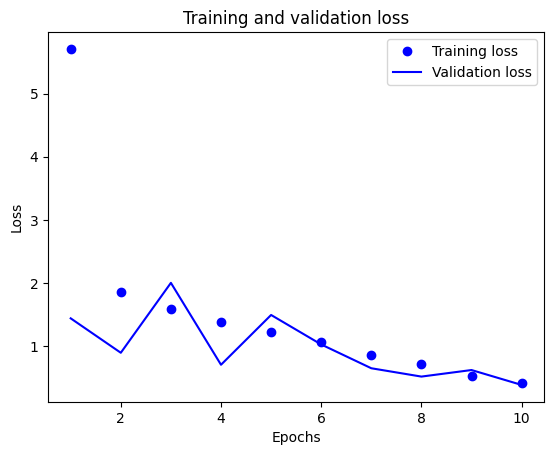

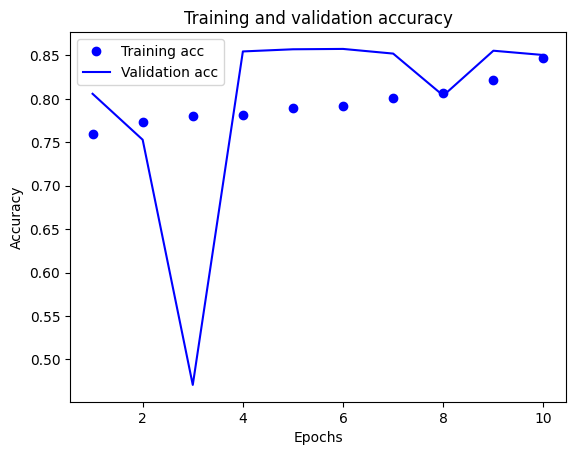

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


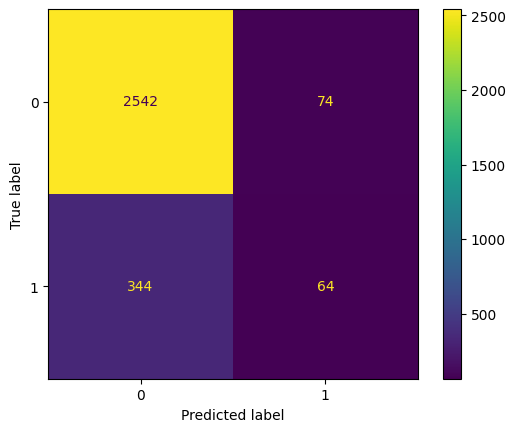

0.23443223443223443


In [ ]:
# Mesmo teste do GaussianNB porém como a MLP retorna uma probabilidade de ser 1
# foi escolhido o ponto de quebra em 0.5 incluso
prediction_mlp = baseline_model.predict(spruce_values_test)
predictions_binary = (prediction_mlp >= 0.5).astype(int)

c_matrix_mlp = confusion_matrix(spruce_label_test, predictions_binary)

display = ConfusionMatrixDisplay(confusion_matrix=c_matrix_mlp)
display.plot()
plt.show()

f1_scoreMLP = f1_score(spruce_label_test, predictions_binary)
print(f1_scoreMLP)

Matrix de confusão sobre set de teste:

![image.png](./images/ConfusionMatrixMLP.png)

Verdadeiro positivo: 64\
Verdadeiro negativo: 2542\
Falso negativo: 74\
Falso positivo: 334\
F1 Score: 0.2344

#### Observações sobre resultados

In [21]:
f1DF = pl.DataFrame({
    "Modelo": ["GaussianNB", "Multilayer Perceptron"],
    "F1 Score": [f1_scoreGNB, f1_scoreMLP]
})

f1DF.head()

Modelo,F1 Score
str,f64
"""GaussianNB""",0.432255
"""Multilayer Perceptron""",0.234432


É possivel pereber que o F1 Score está num valor muito baixo, tanto para o modelo Gaussiano, quanto para o MLP.\
Um dos possíveis motivos pode ser a horrível representatividade dos dados, se observarmos o número de dados onde a árvore é uma "Spruce" ou 1 e "Other" ou 0\
temos um total de apenas 14.28% dos dados, o que dificulta no aprendizado dos modelos.

In [27]:
spruce_count = np.sum(spruce_label == 1)
not_spruce_count = np.sum(spruce_label == 0)

print("Numero de árvores spruce: ",  spruce_count)
print("Número de outras árvores: ",  not_spruce_count)
print("Porcentagem de spruces nos dados total: ", (spruce_count/(spruce_count+not_spruce_count))*100,"%")

Numero de árvores spruce:  2160
Número de outras árvores:  12960
Porcentagem de spruces nos dados total:  14.285714285714285 %
